_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive-beta.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [56]:
## cargar el dataset

In [57]:
import numpy as np
import pandas as pd
sensorData = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', usecols=range(15))
sensorData = sensorData.dropna(how='all', axis=0)
sensorData.replace(-200, np.nan, inplace=True)
sensorData.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [58]:
## ¿cuántas instancias tiene el dataset?

In [59]:
sensorData.shape

(9357, 15)

9358 instancias

In [60]:
## ¿cuál es el tipo de datos de cada una de las columnas?


In [61]:
sensorData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Object y Float 

In [62]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?

13 Continuas
2  Categoricas

In [63]:
## ¿existen valores nulos en el dataset?

Si, hay 114 valores nulos

In [64]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

La variable respuesta es C6H6(GT)( Concentración de Beceno) y es de tipo continua

In [65]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

In [66]:
sensorData.describe()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [67]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

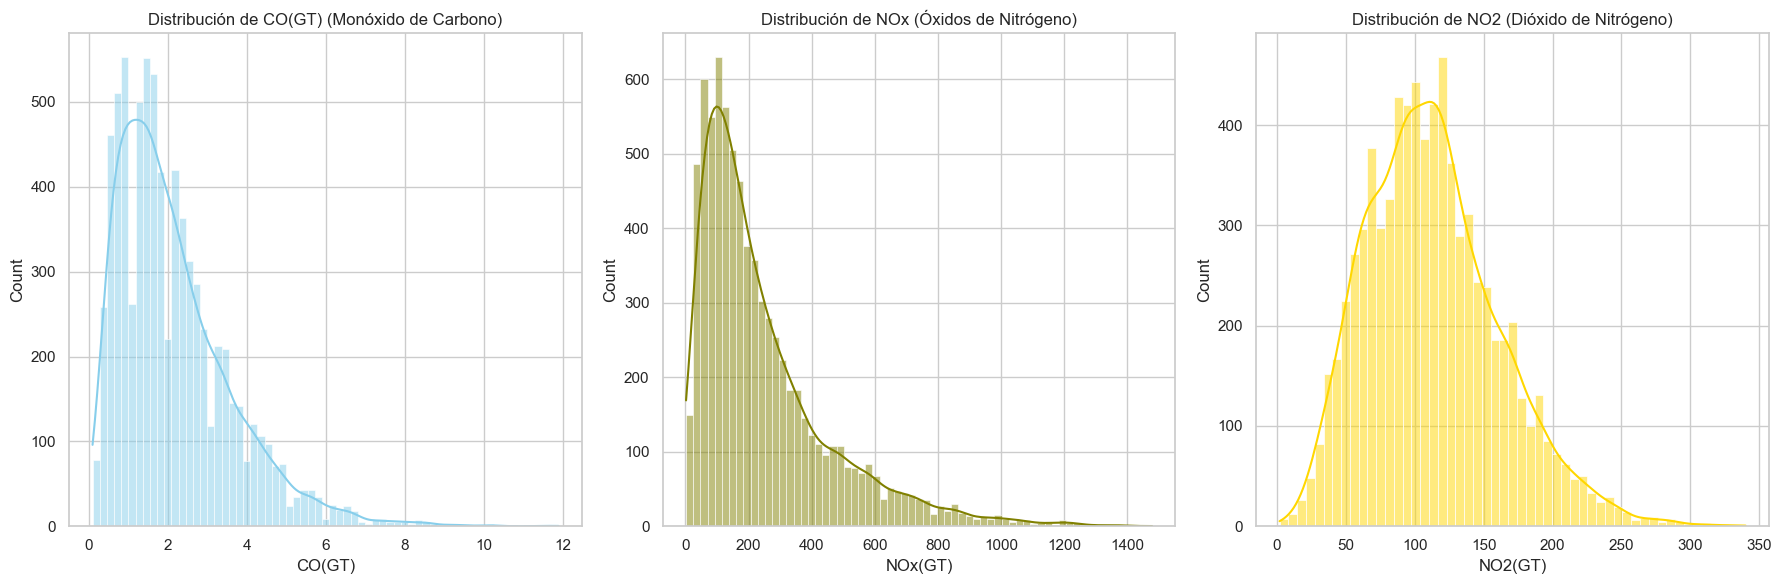

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos
sns.set(style="whitegrid")

# Creando histogramas para CO, NOx y NO2
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma para CO
sns.histplot(sensorData['CO(GT)'], ax=axes[0], kde=True, color="skyblue")
axes[0].set_title('Distribución de CO(GT) (Monóxido de Carbono)')

# Histograma para NOx
sns.histplot(sensorData['NOx(GT)'], ax=axes[1], kde=True, color="olive")
axes[1].set_title('Distribución de NOx (Óxidos de Nitrógeno)')

# Histograma para NO2
sns.histplot(sensorData['NO2(GT)'], ax=axes[2], kde=True, color="gold")
axes[2].set_title('Distribución de NO2 (Dióxido de Nitrógeno)')

plt.tight_layout()
plt.show()


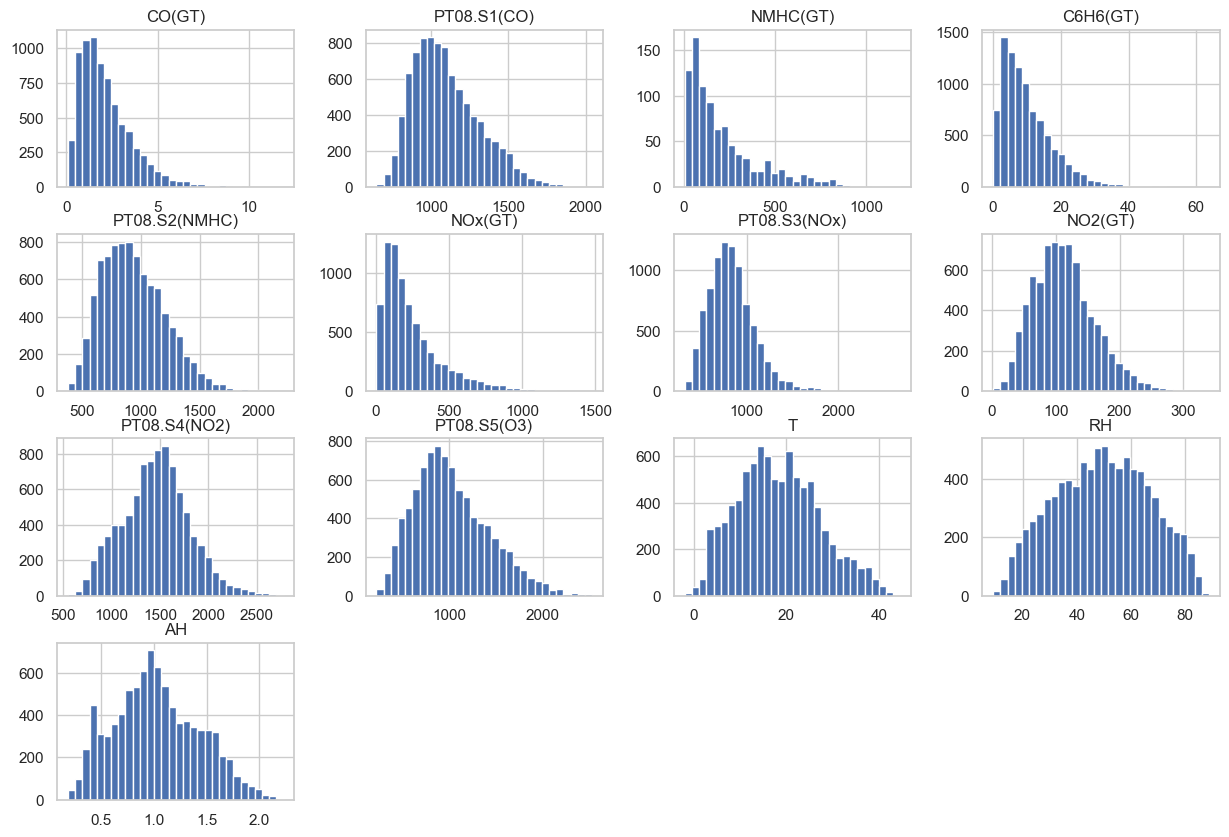

In [69]:
import matplotlib as mtp
sensorData.hist(bins=30, figsize=(15, 10))
plt.show()

Comparando el percentil 50 con la media y los hisotgramas, se concluye que sigue una distribucion sesgada hacia la izquierda

In [70]:
#Vemos el porcentaje de datos nulos que tenemos dentro de las columnas 

In [71]:
#Porcentaje de nulos dentro de cada columna 
sensorData.isnull().mean() * 100

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

-CO(GT) Tenemos un 17,9 % de valores Nulos
-NOx(GT) Tenemos un 17,5 % de valores Nulos
-NO2(GT) Tenemos un 17,5 % de valores Nulos

In [72]:
## ¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

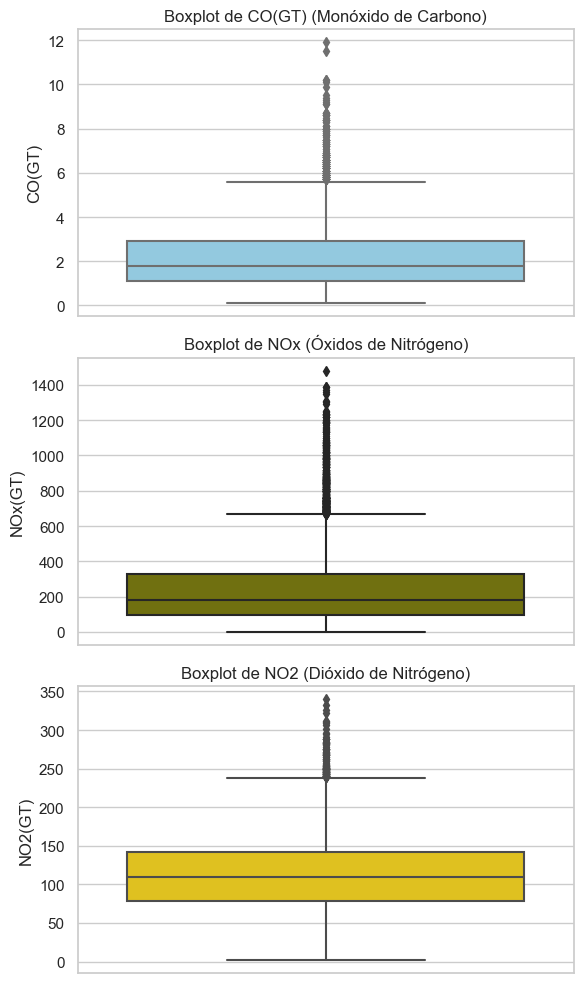

In [73]:
# Creando diagramas de caja (boxplots) verticales para CO, NOx y NO2
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Boxplot vertical para CO
sns.boxplot(data=sensorData, y='CO(GT)', ax=axes[0], color="skyblue")
axes[0].set_title('Boxplot de CO(GT) (Monóxido de Carbono)')

# Boxplot vertical para NOx
sns.boxplot(data=sensorData, y='NOx(GT)', ax=axes[1], color="olive")
axes[1].set_title('Boxplot de NOx (Óxidos de Nitrógeno)')

# Boxplot vertical para NO2
sns.boxplot(data=sensorData, y='NO2(GT)', ax=axes[2], color="gold")
axes[2].set_title('Boxplot de NO2 (Dióxido de Nitrógeno)')

plt.tight_layout()
plt.show()

Muestran una distrubucion sesgada.
Se observa en el grafico de bigotes, que contiene muchos datos por encima de Ls(Limite Superior), haciendo referencia a la aparicion de una gran cantidad de datos anomalos.
Leyendo el repositorio, notamos que los valores faltantes en el dataSet aparecen con un valor -200 

In [74]:
## ¿cómo son las correlaciones entre las variables del dataset?

In [75]:
# Calcula el coeficiente de correlación de Pearson solo para columnas numéricas
corr = sensorData.corr(method='pearson', numeric_only=True)


In [76]:
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.879288,0.889734,0.931078,0.915514,0.795028,-0.703446,0.683343,0.630703,0.854182,0.022109,0.048890,0.048556
PT08.S1(CO),0.879288,1.000000,0.790670,0.883795,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.889734,0.790670,1.000000,0.902559,0.877696,0.812685,-0.771135,0.731193,0.853267,0.766723,0.391587,-0.191454,0.269738
C6H6(GT),0.931078,0.883795,0.902559,1.000000,0.981950,0.718839,-0.735744,0.614474,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.915514,0.892964,0.877696,0.981950,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.795028,0.713654,0.812685,0.718839,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,-0.269683,0.221032,-0.149323
PT08.S3(NOx),-0.703446,-0.771938,-0.771135,-0.735744,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.683343,0.641529,0.731193,0.614474,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.186533,-0.091759,-0.335022
PT08.S4(NO2),0.630703,0.682881,0.853267,0.765731,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.854182,0.899324,0.766723,0.865689,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,-0.027172,0.124956,0.070751


[Text(0.5, 0, 'CO(GT)'),
 Text(1.5, 0, 'PT08.S1(CO)'),
 Text(2.5, 0, 'NMHC(GT)'),
 Text(3.5, 0, 'C6H6(GT)'),
 Text(4.5, 0, 'PT08.S2(NMHC)'),
 Text(5.5, 0, 'NOx(GT)'),
 Text(6.5, 0, 'PT08.S3(NOx)'),
 Text(7.5, 0, 'NO2(GT)'),
 Text(8.5, 0, 'PT08.S4(NO2)'),
 Text(9.5, 0, 'PT08.S5(O3)'),
 Text(10.5, 0, 'T'),
 Text(11.5, 0, 'RH'),
 Text(12.5, 0, 'AH')]

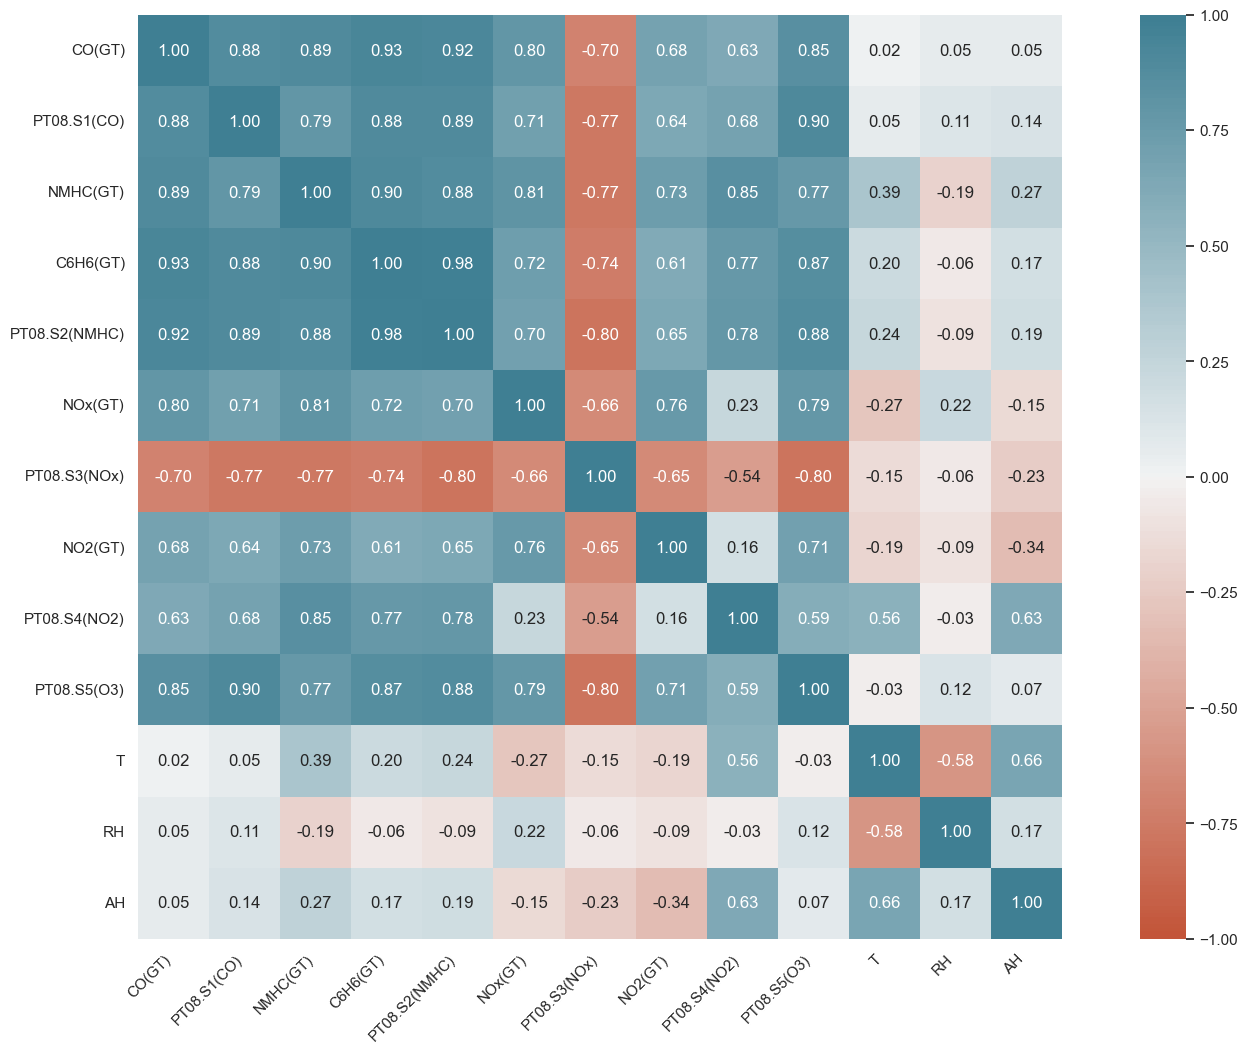

In [77]:
# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

-CO(GT) y C6H6(GT): Una correlación muy alta de 0.93
-PT08.S2(NMHC) y PT08.S5(O3): Una correlación de 0.90 tambien alta
-NMHC(GT) y PT08.S4(NO2): Una correlación de 0.85 
-PT08.S3(NOx) y PT08.S5(O3): Una correlación de-0.79 negativa




In [78]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

Variable objetivo C6H6(GT)
-CO(GT): 0.931078
-PT08.S1(CO): 0.883795
-PT08.S2(NMHC): 0.981950

In [79]:
## ¿existe alguna variable que no tenga correlación?

-RH no tiene correlación -0.06
-T tiene muy baja 0.17 

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

-Las variables como CO, NOx y NO2 muestran distribuciones sesgadas. 
-Se observaron valores atípicos(outliers) lo que influye a la hora de entrenar el modelo. 
-Datos faltantes, con la informacion del DataSet concluimos que valores -200 son datos faltantes.
-Mucha correlacion como es el caso de PT08.S1(CO) y PT08.S2(NMHC)) sugiere la posibilidad de multicolinealidad.
-NOx(GT) que muestran poca correlación con la variable objetivo, podrían no ser útiles para el modelo predictivo

Conclusiones:
1) Se debe realizar un pre procesamiento de los datos, como podria ser normalizar las distribuciones y menajar valores atipicos junto con los faltantes 
2) Seleccionar variables que no contribuyen al modelo 

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [80]:
X = sensorData[["PT08.S1(CO)"]].copy()
X.fillna(X.mean(numeric_only=True), inplace=True)
y = sensorData[["C6H6(GT)"]].copy()
y.fillna(y.mean(numeric_only=True), inplace=True)


In [81]:
X,y

(      PT08.S1(CO)
 0          1360.0
 1          1292.0
 2          1402.0
 3          1376.0
 4          1272.0
 ...           ...
 9352       1314.0
 9353       1163.0
 9354       1142.0
 9355       1003.0
 9356       1071.0
 
 [9357 rows x 1 columns],
       C6H6(GT)
 0         11.9
 1          9.4
 2          9.0
 3          9.2
 4          6.5
 ...        ...
 9352      13.5
 9353      11.4
 9354      12.4
 9355       9.5
 9356      11.9
 
 [9357 rows x 1 columns])

In [82]:
# separar datos de entrenamiento y test

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )


In [84]:
X_train, X_test, y_train, y_test 

(      PT08.S1(CO)
 4957       1013.0
 6933       1438.0
 2265        906.0
 624        1543.0
 7038        982.0
 ...           ...
 7891       1037.0
 9225        826.0
 4859        769.0
 3264       1034.0
 2732       1099.0
 
 [7485 rows x 1 columns],
       PT08.S1(CO)
 1121   917.000000
 8028   918.000000
 3803   766.000000
 4595   775.000000
 587   1010.000000
 ...           ...
 1386   851.000000
 5835  1054.000000
 713   1099.833166
 200    999.000000
 4337   991.000000
 
 [1872 rows x 1 columns],
       C6H6(GT)
 4957       5.4
 6933      16.9
 2265       4.1
 624       19.8
 7038       2.9
 ...        ...
 7891      10.1
 9225       1.1
 4859       2.0
 3264       6.0
 2732      11.0
 
 [7485 rows x 1 columns],
        C6H6(GT)
 1121   5.200000
 8028   1.600000
 3803   2.400000
 4595   2.300000
 587    3.000000
 ...         ...
 1386   8.200000
 5835  13.700000
 713   10.083105
 200    3.600000
 4337   8.000000
 
 [1872 rows x 1 columns])

In [85]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

-PT08.S1(CO) Variable Independiente
-C6H6(GT) Variable Dependiente

In [86]:
# entrena el modelo con los datos de entrenamiento

In [87]:
#Ajustando el Regresion Lineal Simple 

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [88]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [89]:
coef = regression.coef_
intercept = regression.intercept_
print(coef,intercept)


[[0.03035879]] [-23.30832735]


Explica qué indican estos parámetros

Al ser una recta tiene su ordenada al origen (y=0) igual a -23,3 y el coeficiente con el "y" varia dado un cambio en X, igual a 0.03

In [90]:
# realiza las predicciones para el conjunto de datos de test

In [91]:
y_pred = regression.predict(X_test)

In [92]:
y_pred

array([[ 4.53068138],
       [ 4.56104017],
       [-0.05349563],
       ...,
       [10.08127475],
       [ 7.02010201],
       [ 6.7772317 ]])

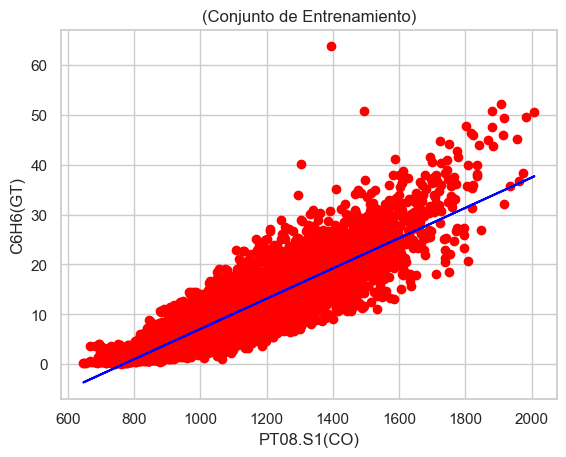

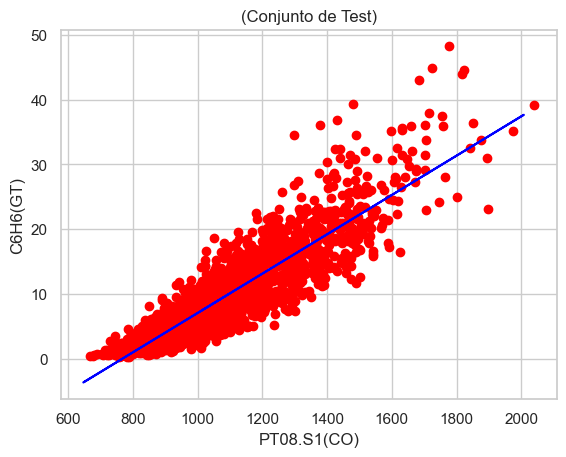

In [93]:
#Visualizar los resultados de entrenamiento

#Realizamos lo nube de dispercion para comprar los resultado de la prediccion con los valores obtenidos 
plt.scatter(X_train, y_train, color = 'red') #Pintamos puntos de los valores reales 
#Trazamos la recta de regresion
plt.plot(X_train, regression.predict(X_train), color = 'blue') #Pintamos la recta de regresion que muestra los valores predichos 
plt.title("(Conjunto de Entrenamiento)")
plt.xlabel("PT08.S1(CO)")
plt.ylabel('C6H6(GT)')
plt.show()

#Visualizar los resultados de test

plt.scatter(X_test, y_test, color = 'red')  
#Importante la recta de regresion, es la misma, ya que se tiene informacion establecida, y no depende si la pinto con el conjunto de test o de entrenamiento 
#La recta de regresion es unica 
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title("(Conjunto de Test)")
plt.xlabel("PT08.S1(CO)")
plt.ylabel('C6H6(GT)')
plt.show()




In [94]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

MSE y RMSE nos pueden interesar mucho, ya que son metricsa que penaliza errores grandes, es decir atipicos y podemos observar su influencia en el modelo. Por otro la R cuadrado, nos muestra que tanta varianza hay en los datos y que tan confiable es el modelo utilizado

In [95]:
# ¿Qué error tiene el modelo? Explícalo.

In [97]:
# Calculando MAE, MSE, RMSE, y R²
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE RLS:", mae)
print("MSE RLS:", mse)
print("RMSE RLS:", rmse)
print("R² RLS:", r2)

MAE RLS: 2.4345638604267505
MSE RLS: 11.117491997893712
RMSE RLS: 3.3342903289746246
R² RLS: 0.7879835479585992


Se observa que el MAE significa que lo valores que predice el modelo estan alejado 2.43 de del valor real, por otra lado MSE indica 11.11 penalizando los valores atipicos.
RMSE las predicciones del modelo se desvia 3.33 del valor real 
R cuadrado del 78% indica alrededor de que variabilidad de 'C6H6(GT)' puede ser explicada por las variaciones en 'PT08.S1(CO)'.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [42]:
X = sensorData.drop(["C6H6(GT)","Date","Time"],axis=1)
X.fillna(X.mean(numeric_only=True), inplace=True)
y = sensorData[["C6H6(GT)"]].copy()
y.fillna(y.mean(numeric_only=True), inplace=True)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [46]:
X_train, X_test, y_train, y_test 


(       CO(GT)  PT08.S1(CO)    NMHC(GT)  PT08.S2(NMHC)     NOx(GT)  \
 4957  2.15275       1013.0  218.811816          781.0  246.896735   
 6933  6.10000       1438.0  218.811816         1208.0  626.000000   
 2265  0.60000        906.0  218.811816          719.0  246.896735   
 624   4.10000       1543.0  710.000000         1290.0  194.000000   
 7038  2.15275        982.0  218.811816          645.0  246.896735   
 ...       ...          ...         ...            ...         ...   
 7891  2.60000       1037.0  218.811816          981.0  388.000000   
 9225  0.50000        826.0  218.811816          512.0   84.000000   
 4859  0.40000        769.0  218.811816          586.0   60.000000   
 3264  1.30000       1034.0  218.811816          812.0   70.000000   
 2732  1.70000       1099.0  218.811816         1015.0  125.000000   
 
       PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
 4957         829.0  113.091251        1469.0        894.0  19.8  66.4  1.514

In [44]:
#Crear modelo de Regresion Lineal Simple 

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

In [45]:
y_pred 

array([[ 5.69806905],
       [-0.40954254],
       [ 1.51205349],
       ...,
       [10.08756223],
       [ 4.09264723],
       [ 8.19167981]])

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

In [96]:
# Calculando MAE, MSE, RMSE, y R²
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE RLM:", mae)
print("MSE RLM:", mse)
print("RMSE RLM:", rmse)
print("R² RLM:", r2)

MAE RLM: 2.4345638604267505
MSE RLM: 11.117491997893712
RMSE RLM: 3.3342903289746246
R² RLM: 0.7879835479585992


Se observa que MAE, MSE, RMSE son mejores, que estos valor mientras mas cercanos a cero sean, menos errores tendra el modelo a la hora de generar predicciones.
Por ultimo R cuadrado muestra un 97% de aciertos para la variable a predecir C6H6(GT)

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegresson necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

* criterion = Es el criterio con el que se mide la calidad de los split o divisiones, pueden ser “squared_error”, “friedman_mse”, “absolute_error”, “poisson”' 
* splitter = Es la estrategia con la que se realizan o eligen los split en cada nodo, pueden ser “best”, “random”
* max_depth = Es la profundidad maxima del arbol, puede ser un entero(int) o ”None” que se expande hasta que todas las hojas sean puras.
* min_samples_split = El numero minimo de muestras para dividir un nodo interno, puede ser int, default=None
* min_samples_leaf = El numero minimo requerido para estar en un nodo hoja puede ser int or float, default=1
* max_features = La cantidad de características a considerar al buscar la mejor división, puede ser int, float o {“auto”, “sqrt”, “log2”}, default=Ninguno


Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

* min_impurity_decrease = Establece un umbral para la disminución de la impureza(error cuadrático medio dentro de cada nodo), es decir, un nodo del árbol solo se dividirá si la división conduce a una disminución de la impureza mayor o igual a este valor. Puede ser util para la prevencion de sobre-ajuste o simplificaion del modelo.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [48]:
##Arbol de decision

from sklearn.tree import DecisionTreeRegressor

#Crear el modelo de árbol de decisión para regresión
modelo_arbol_decision = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None, 
    criterion='poisson',
)

#Ajuste del modelo
modelo_arbol_decision.fit(X_train, y_train)

# Generar predicciones para el conjunto completo de datos de prueba
y_pred = modelo_arbol_decision.predict(X_test)
y_pred = pd.DataFrame(y_pred)



Calcula MAE, R2 y RMSLE

In [51]:
# Calculando MAE, MSE, RMSLE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_squared_log_error
mae = mean_absolute_error(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE Test:", mae)
print("RMSLE Test:", rmsle)
print("R² Test:", r2)

MAE Test: 0.01448230890058589
RMSLE Test: 0.004044715329327572
R² Test: 0.9999062104023934


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

Para detectar si hay overfitting lo que se hace es calcular las metricas, pero en vez de comparar con los conjuntos de test, se compara respecto a los conjuntos de entrenamiento. Las metricas respecto al conjunto de entrenamiento deben ser peores, si no es el caso, estamos en presencia de overfitting 

In [54]:
# Generar predicciones para el conjunto completo de datos de Entrenamiento
y_pred = modelo_arbol_decision.predict(X_train)
y_pred = pd.DataFrame(y_pred)
# Calculando MAE, MSE, RMSE, y R²
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_squared_log_error
mae = mean_absolute_error(y_train, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)

print("MAE Test:", mae)
print("RMSLE Test:", rmsle)
print("R² Test:", r2)

MAE Test: 0.011332078308299305
RMSLE Test: 0.0036106061742141563
R² Test: 0.999585409567269


Como podemos observar el modelo esta sobreajustado, ya que las metricas de entrenamiento y test, son practicamente las misma, dejando como conclusion que el modelo esta sobreentranado. 

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

Comparación Basada en R²
Árbol de Decisión: R² = 0.9999062104023934
Regresión Lineal Múltiple (RLM): R² = 0.9775505188815943
Regresión Lineal Simple (RLS): R² = 0.7879835479585992
El árbol de decisión parece ser superior, con un R² casi perfecto. La RLM también muestra un buen ajuste, aunque no tan alto como el árbol de decisión, mientras que la RLS tiene el ajuste más bajo.
En términos de ajuste del modelo (medido por R²), el árbol de decisión parece ser el mejor. Hay que considerar que hay overfitting, por lo que se concluye que no es mejor modelo, es en funcion del caso, ya que en RLM obtenemos muy buenas metricas.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

Al no tratarse de un datos complejos y al no ser la prioridad la precisión, el modelo que mejores resultado obtuve es el de regresion lineal multiple, ya que las metricas arrojadas son mejores que el modelo de regresion lineal simple y en el caso de arbol de decision obtuve overfitting. 

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_
Darwin, D., Christian, D., Chandra, W., & Nababan, M. (2022). Comparison of Decision Tree and Linear Regression Algorithms in the Case of Spread Prediction of COVID-19 in Indonesia. Journal of Computer Networks, Architecture and High Performance Computing, 4(1), 1-12


título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

Objetivo: La investigación se centra en comparar los algoritmos de árbol de decisión y regresión lineal para predecir casos de COVID-19 en Indonesia.
Antes de procesar los datos con los algoritmos de Árbol de Decisión y Regresión Lineal, se realizó una transformación de datos. Esto incluyó la normalización de datos numéricos y la conversión de datos categóricos en números. Se utilizaron varias variables predictoras como la ubicación, nuevos casos recuperados, casos totales, muertes totales, casos recuperados totales y casos activos totales. La variable criterio utilizada fue los nuevos casos. Se aplicó una técnica de normalización min-max para las propiedades numéricas de los datos.
Se emplearon los algoritmos Decision Tree (CART) y Linear Regression, adaptándolos para predecir nuevos casos de COVID-19 basándose en datos existentes de casos, muertes y recuperaciones. Los resultados mostraron que el algoritmo Decision Tree superó al de regresión lineal en términos de precisión, con un 95.69% en entrenamiento y 92.15% en pruebas, frente al 79.93% y 77.25% de la regresión lineal, respectivamente.